In [1]:
import os
import json

import pandas as pd
import numpy as np
import random

from scipy import stats

import utils as u

# Visualizing
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Feature Selection
from sklearn.feature_selection import RFE, SequentialFeatureSelector, VarianceThreshold, mutual_info_classif, SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Comparisons
import ipywidgets as widgets
from functools import partial
from IPython.display import display, clear_output

In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

## Paths

In [3]:
### Closed Eyes segments
segments_ce = r'C:\Users\enriq\Anaconda\CSIC\DATA_PREPROCESSED_ROIS\segments_ce.csv'

### Open Eyes segments
segments_oe = r'C:\Users\enriq\Anaconda\CSIC\DATA_PREPROCESSED_ROIS\segments_oe.csv'

## Import Data

In [4]:
### Closed Eyes segments
df_ce = pd.read_csv(segments_ce)

### Closed Eyes segments
df_oe = pd.read_csv(segments_oe)

In [ ]:
# Create a copy of the DataFrames and add the indicator column to the copies
df_ce_temp = df_ce.copy()
df_oe_temp = df_oe.copy()

df_ce_temp['eyes'] = 0  # 0 indicates records from df_ce
df_oe_temp['eyes'] = 1  # 1 indicates records from df_oe

# Concatenate the DataFrames with the indicator column
df_complete = pd.concat([df_ce_temp, df_oe_temp], axis=0, ignore_index=True)

## 1. Data Preprocessing

In [6]:
df_train, df_test, train_patients, test_patients, rs = u.pre_requirements(df_ce)


Select the classifier type:
1. Classifier - Microstate Endpoint: Uses 'MicrostateTo' as the target variable.
2. Classifier - Microstate Transition: Uses 'MicrostateTransition' as the target variable.


Enter the number corresponding to your choice:  2


Random State:  20


The features and labels can be extracted as a DataFrame or array object for the following procedures that will be performed.

In [100]:
df_X_train, df_y_train, df_X_test, df_y_test = u.extraction(df_train, df_test)


Select the data format:
1: Returns data as DataFrames.
2: Returns data as NumPy arrays.


Enter the number corresponding to your choice:  1



Select the classifier type:
1. Classifier - Microstate Endpoint: Uses 'MicrostateTo' as the target variable.
2. Classifier - Microstate Transition: Uses 'MicrostateTransition' as the target variable.


Enter the number corresponding to your choice:  2


In [8]:
X_train, y_train, X_test, y_test = u.extraction(df_train, df_test)


Select the data format:
1: Returns data as DataFrames.
2: Returns data as NumPy arrays.


Enter the number corresponding to your choice:  2



Select the classifier type:
1. Classifier - Microstate Endpoint: Uses 'MicrostateTo' as the target variable.
2. Classifier - Microstate Transition: Uses 'MicrostateTransition' as the target variable.


Enter the number corresponding to your choice:  2


In [9]:
# Print shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (14400, 210)
Shape of y_train: (14400,)
Shape of X_test: (3552, 210)
Shape of y_test: (3552,)


## 2. Data Normalization

In [10]:
# Choosing Standard Scaler as normalizing function
X_train_norm, X_test_norm = u.normalizing('ss', X_train, X_test)

In [11]:
# Concatenate the normalized features with the target variable
train_norm = np.hstack((y_train.reshape(-1,1), X_train_norm))
test_norm = np.hstack((y_test.reshape(-1,1), X_test_norm))

# Convert it in a DataFrame
df_train_norm = pd.DataFrame(train_norm, columns=df_train.columns)
df_test_norm = pd.DataFrame(test_norm, columns=df_test.columns)

## 3. Feature Selection

Some previous requirements to perform the feature selection process are the following:

In [12]:
# Store the columns in an index object
columns = df_train.columns

In [13]:
# Store all the features (ROIs) in a list
features = list(columns)[1:]

In [14]:
# Obtain the features as a dataframe for both subsets, train and test
df_X_train_norm = pd.DataFrame(df_train_norm.drop(columns=['MicrostateTransition']).values, columns=features)
df_X_test_norm = pd.DataFrame(df_test_norm.drop(columns=['MicrostateTransition']).values, columns=features)

### 3.1. Logistic Regression

#### 3.1.1. Multinomial Logistic Regression Coefficients

In [15]:
coefficients = []
intercepts = []

for feature in features:
    lr = u.log_reg(df_X_train_norm, y_train, df_X_test_norm, feature=feature)
    coefficients.append(lr[0])
    intercepts.append(lr[1])

# Store the coefficients as well as the feature positions with respect them in two dictionaries
importances_LR, feature_positions_LR = u.importances_model(features, coefficients)

In [16]:
# Obtain best features according to Logistic Regression
best_features_LR_50 = list(feature_positions_LR.keys())[:50]
best_features_LR_100 = list(feature_positions_LR.keys())[:100]
best_features_LR_150 = list(feature_positions_LR.keys())[:150]

Showing the results.

In [17]:
u.print_results_model(importances_LR)

Feature - Importance
1. ROI_25: 0.17355619656843266
2. ROI_130: 0.15205618256576683
3. ROI_128: 0.14740836829657278
4. ROI_23: 0.14548124138451943
5. ROI_94: 0.11420212961513565
6. ROI_35: 0.11408070882590553
7. ROI_83: 0.11127702102722553
8. ROI_22: 0.11127356553535002
9. ROI_59: 0.10994967000393034
10. ROI_84: 0.10793999354732084
11. ROI_127: 0.10740082332655078
12. ROI_182: -0.10593027892167663
13. ROI_193: -0.10568348475581829
14. ROI_88: -0.1030122966710208
15. ROI_181: -0.10075149479117403
16. ROI_196: -0.09800695163232409
17. ROI_209: -0.09730869964119634
18. ROI_77: -0.09667824753365879
19. ROI_140: 0.09666736369726785
20. ROI_131: 0.09502057518565485
21. ROI_189: 0.09386045446247653
22. ROI_19: 0.09224388483342286
23. ROI_68: -0.0907719546893488
24. ROI_204: -0.08955176036166378
25. ROI_101: -0.0893923396674409
26. ROI_26: 0.089290789681748
27. ROI_123: 0.0875702659683915
28. ROI_210: -0.08752907072252063
29. ROI_76: -0.08702867563060451
30. ROI_91: -0.08681036881907168
31. RO

Plotting the results.

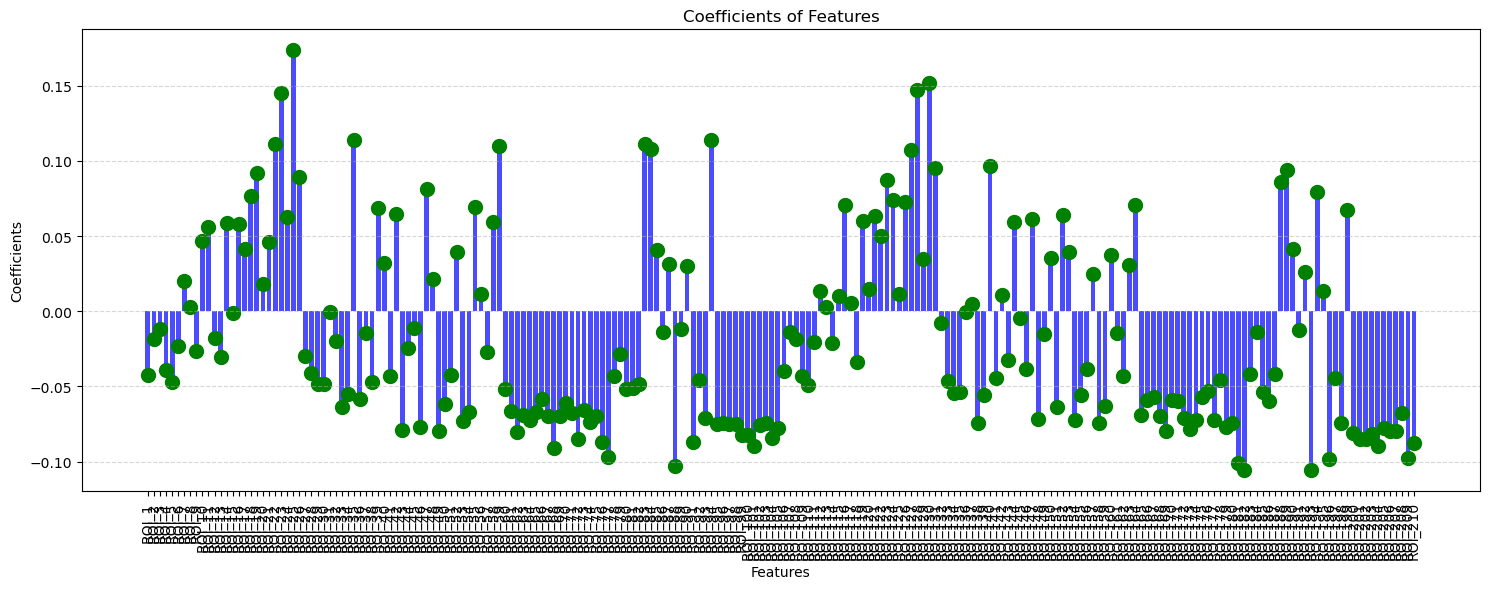

In [18]:
u.plot_results_model(coefficients, features)

In [19]:
# Initialize the model
LR = LogisticRegression(max_iter=1000)

##### I. Recursive Feature Elimination (RFE)

In [20]:
#selected_features_RFE_LR = u.wrappers(LR, 'RFE', 50, X_train_norm, y_train_norm, features)

In [21]:
#u.wrappers_print(selected_features_RFE_LR, feature_positions_LR, importances_LR_sorted)

##### II. Forward Selection

In [22]:
#selected_features_FS_LR = u.wrappers(LR, 'FS', 50, X_train_norm, y_train_norm, features)

In [23]:
#u.wrappers_print(selected_features_FS_LR, feature_positions_LR, importances_LR_sorted)

##### III. Backward Elimination

In [24]:
#selected_features_BE_LR = u.wrappers(LR, 'BE', 50, X_train_norm, y_train_norm, features)

In [25]:
#u.wrappers_print(selected_features_BE_LR, feature_positions_LR, importances_LR_sorted)

### 3.2. Tree-Based Models

In [26]:
TC = ExtraTreesClassifier(n_estimators=100, random_state=10)

RF = RandomForestClassifier(n_estimators=100, random_state=42)

GB = GradientBoostingClassifier(n_estimators=100, random_state=42)

XG = XGBClassifier(n_estimators=100, random_state=42)

#### 3.2.1. Tree Classifier for Feature Importance

In [27]:
# Store the importances regarding tree classifiers as well as the feature positions with respect them in two dictionaries
importances_TC, feature_positions_TC = u.tree_model(TC, X_train, y_train, features)

Showing the results.

In [28]:
u.print_results_model(importances_TC)

Feature - Importance
1. ROI_130: 0.005510514293870033
2. ROI_25: 0.005468269185410002
3. ROI_88: 0.0054680866227907856
4. ROI_196: 0.005433460353939522
5. ROI_194: 0.0053898126824638935
6. ROI_59: 0.005321405651741214
7. ROI_163: 0.005298946099787514
8. ROI_55: 0.00521726047652066
9. ROI_128: 0.005214904568938623
10. ROI_164: 0.005205541327419582
11. ROI_193: 0.005184563966572309
12. ROI_23: 0.005162915287913104
13. ROI_91: 0.005150640534489869
14. ROI_58: 0.005146069800429695
15. ROI_160: 0.005119366346836423
16. ROI_182: 0.005100993186549616
17. ROI_94: 0.0050969834266101546
18. ROI_77: 0.00507531966123296
19. ROI_161: 0.005072051974073454
20. ROI_99: 0.005053358169618474
21. ROI_90: 0.005048982291948438
22. ROI_157: 0.00504744553460528
23. ROI_82: 0.0050417346351657845
24. ROI_181: 0.005038770062039293
25. ROI_89: 0.005036777020645935
26. ROI_203: 0.005023965049715366
27. ROI_57: 0.005021825414497047
28. ROI_76: 0.00501807863323652
29. ROI_140: 0.005014594262439148
30. ROI_187: 0.00

Plotting the results.

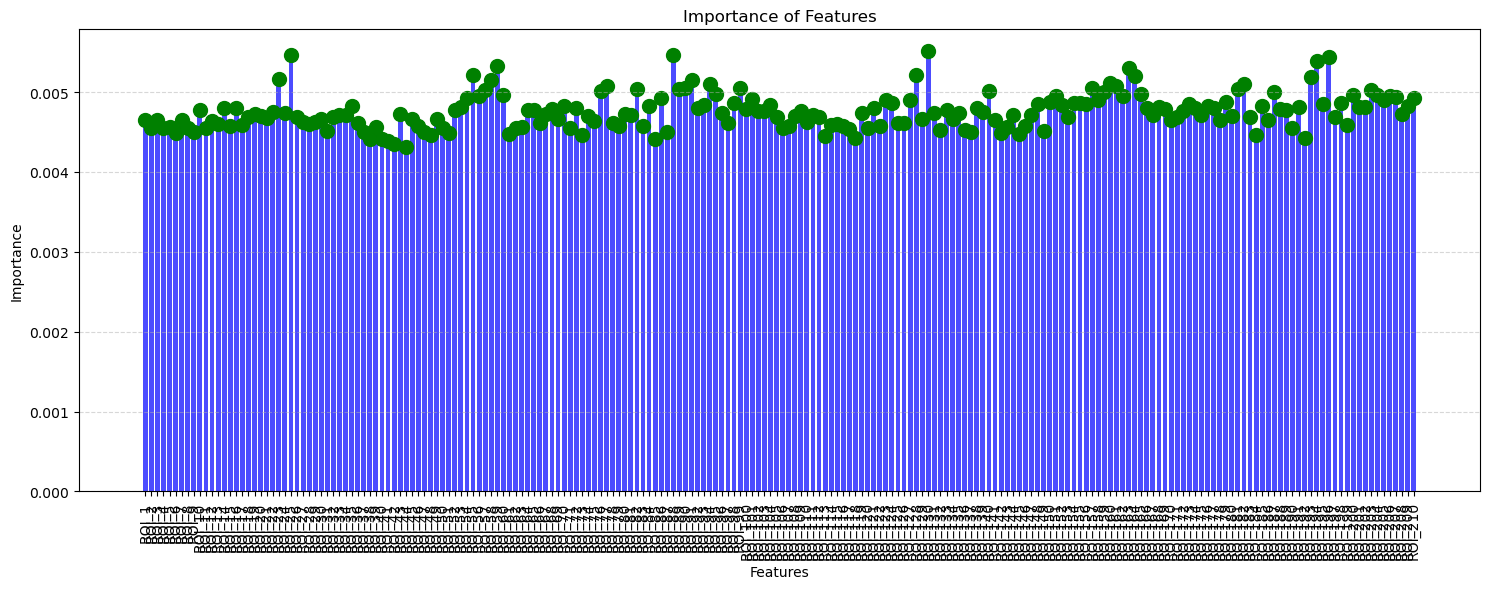

In [29]:
u.plot_results_model(TC.feature_importances_, features)

##### I. Recursive Feature Elimination (RFE)

In [30]:
#selected_features_RFE_TC = u.wrappers(TC, 'RFE', 50, X_train, y_train, features)

In [31]:
#u.wrappers_print(selected_features_RFE_TC, feature_positions_TC, importances_TC)

##### II. Forward Selection

In [32]:
#selected_features_FS_TC = u.wrappers(TC, 'FS', 50, X_train, y_train, features)

In [33]:
#u.wrappers_print(selected_features_FS_TC, feature_positions_TC, importances_TC)

##### III. Backward Elimination

In [34]:
#selected_features_BE_TC = u.wrappers(TC, 'BE', 50, X_train, y_train, features)

In [35]:
#u.wrappers_print(selected_features_BE_TC, feature_positions_TC, importances_TC)

#### 3.2.2. Random Forest for Feature Importance

In [36]:
# Store the importances regarding random forest as well as the feature positions with respect them in two dictionaries
importances_RF, feature_positions_RF = u.tree_model(RF, X_train, y_train, features)

Showing the results.

In [37]:
u.print_results_model(importances_RF)

Feature - Importance
1. ROI_25: 0.006075020789204882
2. ROI_130: 0.006023024769229192
3. ROI_88: 0.005610421530018549
4. ROI_193: 0.005567949549800428
5. ROI_94: 0.00547176667196311
6. ROI_194: 0.005361271297976045
7. ROI_128: 0.00525487096745111
8. ROI_196: 0.005254751325000307
9. ROI_89: 0.005229957065690766
10. ROI_59: 0.005219868587035314
11. ROI_77: 0.005183301112085775
12. ROI_82: 0.0051801325519123765
13. ROI_163: 0.005170128093872065
14. ROI_174: 0.005120993954396394
15. ROI_177: 0.005114603404279061
16. ROI_148: 0.005114384843344034
17. ROI_90: 0.005109463615440073
18. ROI_173: 0.00509027699156608
19. ROI_91: 0.005088380913404214
20. ROI_181: 0.0050659164372927135
21. ROI_199: 0.005062765044494708
22. ROI_164: 0.0050574732173381595
23. ROI_201: 0.005046828175039382
24. ROI_187: 0.005037649771627921
25. ROI_204: 0.005034628634776969
26. ROI_14: 0.005012930373474767
27. ROI_167: 0.005011874854292207
28. ROI_104: 0.005007411083140078
29. ROI_198: 0.005004685187908763
30. ROI_154:

Plotting the results.

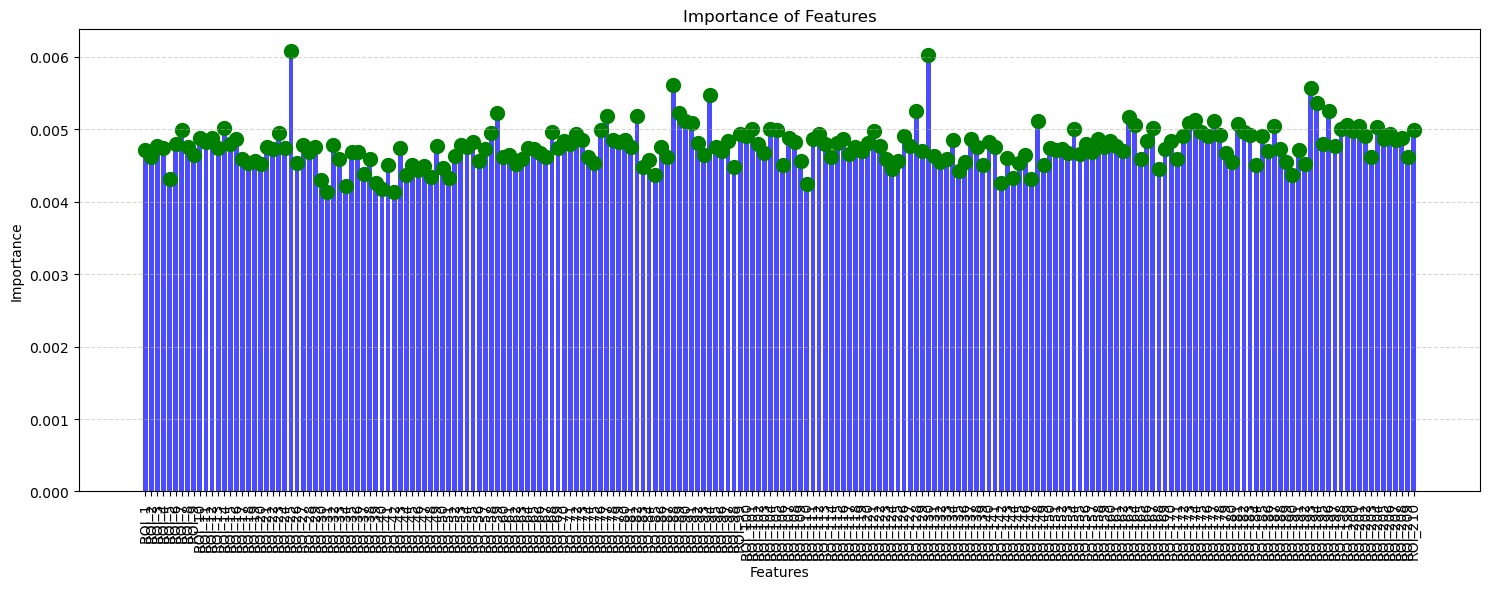

In [38]:
u.plot_results_model(RF.feature_importances_, features)

##### I. Recursive Feature Elimination (RFE)

In [39]:
#selected_features_RFE_RF, feature_positions_RF = u.wrappers(RF, 'RFE', 50, X_train, y_train, features)

In [40]:
#u.wrappers_print(selected_features_RF, feature_positions_RF, importances_RF)

##### II. Forward Selection

In [41]:
#selected_features_FS_RF, feature_positions_RF = u.wrappers(RF, 'FS', 50, X_train, y_train, features)

In [42]:
#u.wrappers_print(selected_features_FS_RF, feature_positions_RF, importances_RF)

##### III. Backward Elimination

In [43]:
#selected_features_BE_RF, feature_positions_RF = u.wrappers(RF, 'BE', 50, X_train, y_train, features)

In [44]:
#u.wrappers_print(selected_features_BE_RF, feature_positions_RF, importances_RF)

#### 3.2.3. Gradient Boosting for Feature Importance

In [45]:
# Store the importances regarding gradient boosting as well as the feature positions with respect them in two dictionaries
importances_GB, feature_positions_GB = u.tree_model(GB, X_train, y_train, features)

In [46]:
# Obtain best features according to the Gradient Boosting model
best_features_GB_50 = list(feature_positions_GB.keys())[:50]
best_features_GB_100 = list(feature_positions_GB.keys())[:100]
best_features_GB_150 = list(feature_positions_GB.keys())[:150]

Showing the results.

In [47]:
u.print_results_model(importances_GB)

Feature - Importance
1. ROI_130: 0.022241144668717718
2. ROI_25: 0.019318137819588677
3. ROI_88: 0.01422589849656904
4. ROI_196: 0.010513078576472734
5. ROI_194: 0.010186256030142846
6. ROI_94: 0.009635275800971886
7. ROI_193: 0.009594071336660164
8. ROI_128: 0.009323269288729435
9. ROI_206: 0.00891504379063528
10. ROI_89: 0.008316310658321982
11. ROI_103: 0.008194144109180925
12. ROI_181: 0.007951720115014854
13. ROI_72: 0.007569632174155017
14. ROI_68: 0.007458671234354787
15. ROI_182: 0.007245443447132326
16. ROI_174: 0.007137960658812791
17. ROI_29: 0.006726985430869372
18. ROI_1: 0.006697070678622251
19. ROI_98: 0.0066911215110510855
20. ROI_203: 0.006667951762135262
21. ROI_210: 0.0065669471902217915
22. ROI_102: 0.006531360525101176
23. ROI_23: 0.006486255658934556
24. ROI_191: 0.006464943406046449
25. ROI_129: 0.006443550810439242
26. ROI_151: 0.006373223006946402
27. ROI_90: 0.006350377626621601
28. ROI_175: 0.006276313113742547
29. ROI_8: 0.0062457585814963135
30. ROI_164: 0.

Plotting the results.

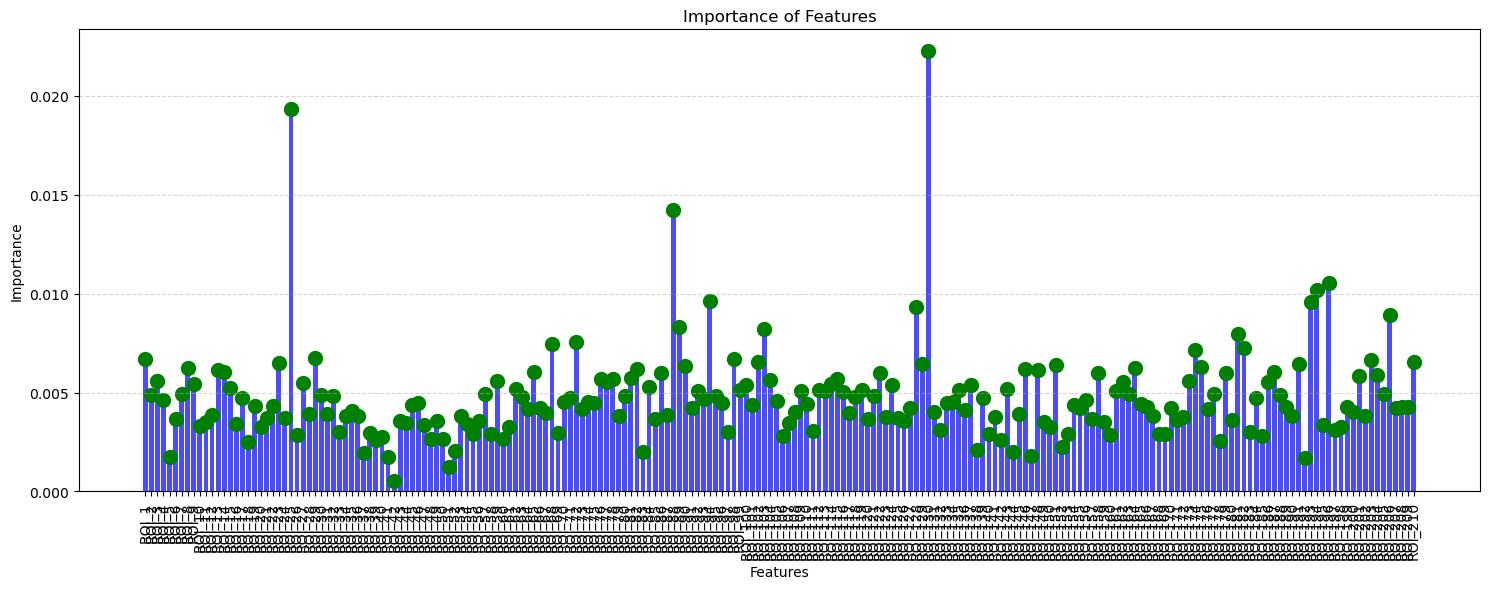

In [48]:
u.plot_results_model(GB.feature_importances_, features)

##### I. Recursive Feature Elimination (RFE)

In [49]:
#selected_features_RFE_GB = u.wrappers(GB, 'RFE', 50, X_train, y_train, features)

In [50]:
#u.wrappers_print(selected_features_RFE_GB, feature_positions_GB, importances_GB)

##### II. Forward Selection

In [51]:
#selectedFS_features_FS_GB = u.wrappers(GB, 'FS', 50, X_train, y_train, features)

In [52]:
#u.wrappers_print(selectedFS_features_FS_GB, feature_positions_GB, importances_GB)

##### III. Backward Elimination

In [53]:
#selected_features_BE_GB = u.wrappers(GB, 'BE', 50, X_train, y_train, features)

In [54]:
#u.wrappers_print(selected_features_BE_GB, feature_positions_GB, importances_GB)

#### 3.2.4. XGBoost for Feature Importance

In [55]:
# Store the importances regarding xgboost as well as the feature positions with respect them in two dictionaries
importances_XG, feature_positions_XG = u.tree_model(XG, X_train, y_train, features)

Showing the results.

In [56]:
u.print_results_model(importances_XG)

Feature - Importance
1. ROI_25: 0.006253628525882959
2. ROI_130: 0.006193106062710285
3. ROI_196: 0.005984253715723753
4. ROI_165: 0.005948422942310572
5. ROI_162: 0.005928654223680496
6. ROI_189: 0.005569238215684891
7. ROI_191: 0.005563672631978989
8. ROI_98: 0.005469195544719696
9. ROI_88: 0.005434888880699873
10. ROI_155: 0.005383561365306377
11. ROI_103: 0.00537601625546813
12. ROI_150: 0.005315947812050581
13. ROI_204: 0.0053122215904295444
14. ROI_163: 0.005309231113642454
15. ROI_45: 0.0052688815630972385
16. ROI_192: 0.005229381378740072
17. ROI_56: 0.00521891238167882
18. ROI_131: 0.005215947516262531
19. ROI_158: 0.005212054122239351
20. ROI_193: 0.005210841074585915
21. ROI_53: 0.0051682512275874615
22. ROI_102: 0.005158691667020321
23. ROI_94: 0.005124526564031839
24. ROI_202: 0.005119465757161379
25. ROI_99: 0.005113818682730198
26. ROI_24: 0.005111376754939556
27. ROI_22: 0.005093834362924099
28. ROI_101: 0.005093204788863659
29. ROI_110: 0.005075311753898859
30. ROI_48:

Plotting the results.

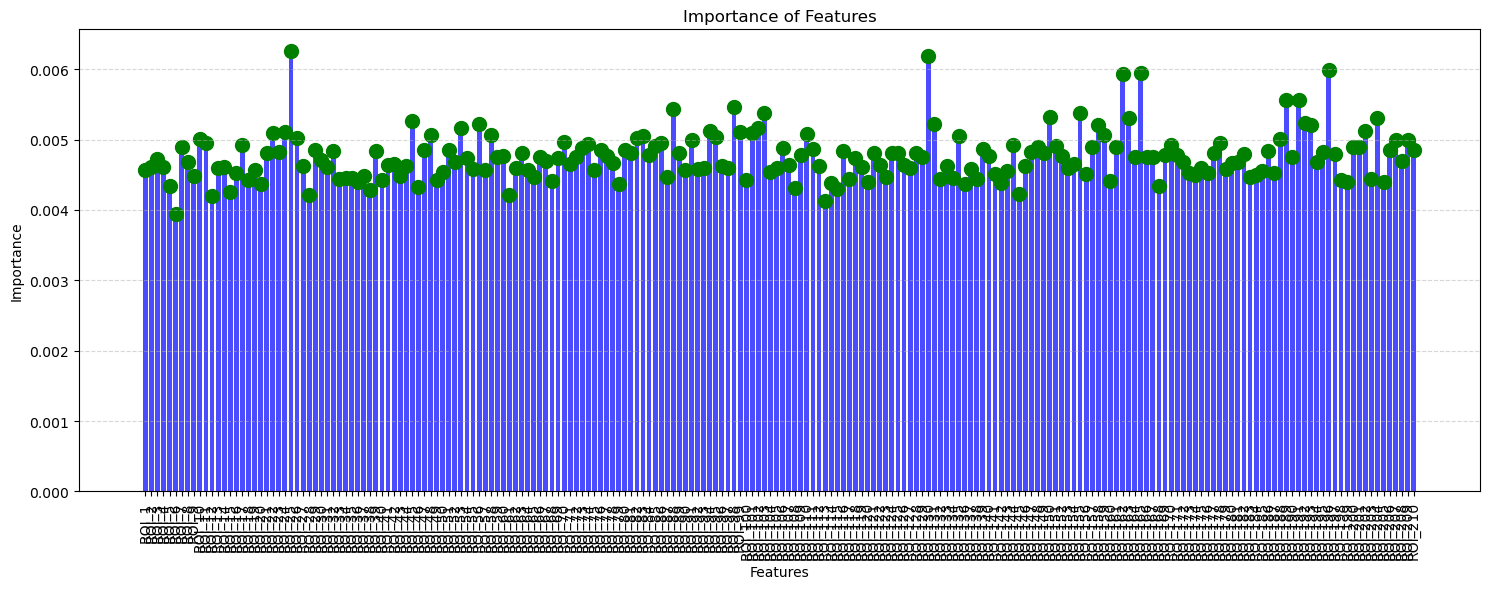

In [57]:
u.plot_results_model(XG.feature_importances_, features)

##### I. Recursive Feature Elimination (RFE)

In [58]:
#selected_features_RFE_XG = u.wrappers(XG, 'RFE', 50, X_train, y_train, features)

In [59]:
#u.wrappers_print(selected_features_RFE_XG, feature_positions_XG, importances_XG)

##### II. Forward Selection

In [60]:
#selected_features_FS_XG = u.wrappers(XG, 'FS', 50, X_train, y_train, features)

In [61]:
#u.wrappers_print(selected_features_FS_XG, feature_positions_XG, importances_XG)

##### III. Backward Elimination

In [62]:
#selected_features_BE_XG = u.wrappers(XG, 'BE', 50, X_train, y_train, features)

In [63]:
#u.wrappers_print(selected_features_BE_XG, feature_positions_XG, importances_XG)

### 3.3. Filter Methods

#### 3.3.1. Variance Threshold

In [64]:
# Calculate the variance of each feature
v = np.var(X_train, axis=0)

# Store the variance as well as the feature positions with respect them in two dictionaries
importances_v, feature_positions_v = u.importances_model(features, v)

Showing the results.

In [65]:
u.print_results_model(importances_v)

Feature - Importance
1. ROI_99: 0.48315519808732177
2. ROI_204: 0.4793778525767905
3. ROI_201: 0.47528870203600404
4. ROI_96: 0.461618242951244
5. ROI_40: 0.4541752482738213
6. ROI_181: 0.44984712954660555
7. ROI_202: 0.4422441031769554
8. ROI_207: 0.4401572772382518
9. ROI_76: 0.43964664576590684
10. ROI_102: 0.4392319577505504
11. ROI_203: 0.43654789716827413
12. ROI_97: 0.43498609968289503
13. ROI_205: 0.4333488544711293
14. ROI_100: 0.4308518752606204
15. ROI_44: 0.4276354817276172
16. ROI_98: 0.42605229065510053
17. ROI_208: 0.4242685976570715
18. ROI_200: 0.42017329471818027
19. ROI_42: 0.4188730244647862
20. ROI_95: 0.4179434548126383
21. ROI_91: 0.4140966162870398
22. ROI_41: 0.41399768515572977
23. ROI_129: 0.41375876617960733
24. ROI_158: 0.41155781419924437
25. ROI_39: 0.4114338803701478
26. ROI_69: 0.40647290757510796
27. ROI_38: 0.4048148404905091
28. ROI_67: 0.4047173580996158
29. ROI_64: 0.4035145721020738
30. ROI_196: 0.40084340592885204
31. ROI_103: 0.3976248409555181


Finally, the **Variance Threshold** Filtering Method is implemented.

In [66]:
# Calculate variance and set the threshold
threshold = np.percentile(v, 10)

# Features with variance below 0.1 will be removed
selector = VarianceThreshold(threshold=threshold)
X_selected = selector.fit_transform(X_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)
selected_features = np.array(features)[selected_indices]

print("\nSelected Features:")
print(len(selected_features))


Selected Features:
189


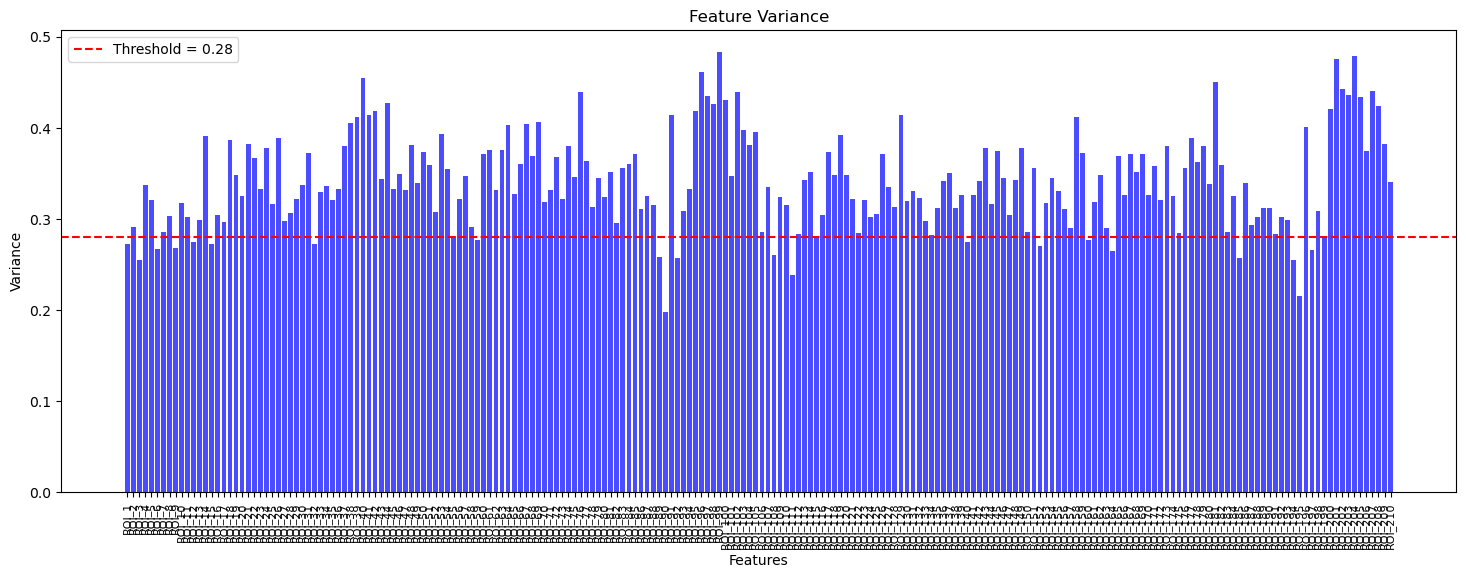

In [67]:
# Create a bar plot of feature variances
plt.figure(figsize=(18, 6))
plt.bar(features, v, color='b', alpha=0.7)

# Add a horizontal line for the threshold
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold = {round(threshold, 3)}')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Feature Variance')

# Add xticks with smaller font size and rotation
plt.xticks(rotation=90, fontsize=8)

# Add a legend
plt.legend()

# Show the plot
plt.show()

#### 3.3.2. Mutual Information

In [68]:
# Calculate Mutual Information
mi = mutual_info_classif(X_train, y_train)

# Store the mutual information as well as the feature positions with respect them in two dictionaries
importances_mi, feature_positions_mi = u.importances_model(features, mi)

The best features according to mutual information are obtained.

In [69]:
# Filter dictionary to remove entries with values lower than the 75% percentile
pruned_mi = {k: v for k, v in importances_mi.items() if v > np.percentile(mi, 75)}

# Filter dictionary to remove entries with values of 0
#pruned_mi = {k: v for k, v in importances_mi.items() if v != 0}

# Obtain best features according to mutual information
best_features_mi = list(pruned_mi.keys())

Showing the results.

In [70]:
u.print_results_model(importances_mi)

Feature - Importance
1. ROI_180: 0.01863129491560711
2. ROI_86: 0.01405113603484498
3. ROI_70: 0.01336914773126141
4. ROI_167: 0.01322898755334423
5. ROI_35: 0.013220654909836593
6. ROI_124: 0.011935237665933407
7. ROI_94: 0.011635265299786202
8. ROI_209: 0.011032558065076525
9. ROI_191: 0.010938388442408797
10. ROI_130: 0.01076927566081487
11. ROI_121: 0.010371377762064427
12. ROI_14: 0.010030509624683326
13. ROI_15: 0.010017531070432906
14. ROI_152: 0.009895620110353054
15. ROI_174: 0.00971286510369529
16. ROI_22: 0.009605794975877657
17. ROI_92: 0.00957664606754749
18. ROI_23: 0.00953155588333221
19. ROI_157: 0.009342545804571056
20. ROI_37: 0.009193680292685968
21. ROI_77: 0.008878124319736447
22. ROI_96: 0.008552596706112414
23. ROI_185: 0.008441108666215502
24. ROI_25: 0.008272826273807876
25. ROI_64: 0.008144121317453124
26. ROI_187: 0.008012362241226256
27. ROI_43: 0.00801212053575151
28. ROI_166: 0.007936483559114027
29. ROI_60: 0.007818831466638088
30. ROI_17: 0.0076523939200

#### 3.3.3. Correlation Coefficient

##### I. Correlation with respect to the target variable

###### Spearman's Rank Correlation

In [71]:
# Compute Spearman's Rank Correlation

correlation_results_all = []
correlation_results_pval = {}

for feature in features:
    rho, p_value = stats.spearmanr(df_X_train[feature], y_train)
    correlation_results_all.append(rho)
    if p_value < 0.05:
        correlation_results_pval[feature] = rho

# Sort the correlation dictionary (the one with respect the p_value) by correlation coefficient (first value in the tuple)
correlation_results_pval = dict(sorted(correlation_results_pval.items(), key=lambda item: abs(item[1]), reverse=True))

# Store the Spearman's Rank Correlation as well as the feature positions with respect them in two dictionaries
importances_scc, feature_positions_scc = u.importances_model(features, correlation_results_all)

###### Pearson's Correlation

In [72]:
# Compute the correlation matrix
correlation_matrix = df_train.corr()

# Obtain correlations with the target variable
cc = list(correlation_matrix['MicrostateTransition'])[1:]

# Store the mutual information as well as the feature positions with respect them in two dictionaries
importances_cc, feature_positions_cc = u.importances_model(features, cc)

The best features according to correlation coefficient are obtained.

In [73]:
# Obtain best features according to correlation coefficient
best_features_cc = list(feature_positions_cc.keys())[:len(best_features_mi)]

Showing the results.

In [74]:
u.print_results_model(importances_cc)

Feature - Importance
1. ROI_25: -0.049939032602832875
2. ROI_130: -0.049689580462459984
3. ROI_128: -0.047019311816723995
4. ROI_23: -0.04670741592174614
5. ROI_22: -0.03796600776206009
6. ROI_94: -0.037368728784365285
7. ROI_35: -0.03689386296875571
8. ROI_83: -0.03640434160892839
9. ROI_84: -0.03638401482192621
10. ROI_127: -0.03611435512666155
11. ROI_140: -0.03599723899210895
12. ROI_59: -0.035172891804337914
13. ROI_189: -0.03505114366626401
14. ROI_131: -0.033845253879951596
15. ROI_19: -0.03360323241709624
16. ROI_188: -0.03305003440049171
17. ROI_26: -0.03262490690499759
18. ROI_123: -0.03159507913302601
19. ROI_18: -0.029834074605270416
20. ROI_11: -0.0290017485922339
21. ROI_164: -0.02876955285434428
22. ROI_124: -0.028508283210550288
23. ROI_194: -0.028291838462121237
24. ROI_16: -0.028182175777542947
25. ROI_116: -0.02696192034471269
26. ROI_47: -0.02677225277411396
27. ROI_14: -0.02659468641050929
28. ROI_126: -0.02650835412155038
29. ROI_55: -0.025826275566412663
30. ROI_

##### II. Correlation between features - grouping features with high correlation

Computing different groups of features which have high correletion between them.

In [75]:
correlation_groups = u.corr_groups(df_X_train, 0.8, print_=True)


 Group 1: ['ROI_1', 'ROI_2', 'ROI_4', 'ROI_5', 'ROI_13', 'ROI_28', 'ROI_30', 'ROI_34', 'ROI_92', 'ROI_106', 'ROI_109', 'ROI_110', 'ROI_135', 'ROI_139', 'ROI_197']

 Group 2: ['ROI_3', 'ROI_6', 'ROI_108', 'ROI_111']

 Group 3: ['ROI_7', 'ROI_10', 'ROI_11', 'ROI_14', 'ROI_21', 'ROI_23', 'ROI_24', 'ROI_94', 'ROI_126', 'ROI_129', 'ROI_199']

 Group 4: ['ROI_8']

 Group 5: ['ROI_9', 'ROI_12']

 Group 6: ['ROI_15', 'ROI_16', 'ROI_17', 'ROI_19', 'ROI_20', 'ROI_22', 'ROI_26', 'ROI_35', 'ROI_39', 'ROI_42', 'ROI_47', 'ROI_59', 'ROI_83', 'ROI_84', 'ROI_85', 'ROI_87']

 Group 7: ['ROI_18']

 Group 8: ['ROI_25', 'ROI_55', 'ROI_56', 'ROI_57', 'ROI_58', 'ROI_60', 'ROI_82', 'ROI_161', 'ROI_162', 'ROI_163', 'ROI_165']

 Group 9: ['ROI_27', 'ROI_32', 'ROI_78']

 Group 10: ['ROI_29', 'ROI_33', 'ROI_65', 'ROI_66', 'ROI_67', 'ROI_74', 'ROI_75', 'ROI_81', 'ROI_138', 'ROI_168', 'ROI_171', 'ROI_179', 'ROI_180', 'ROI_186']

 Group 11: ['ROI_31', 'ROI_37', 'ROI_38', 'ROI_40', 'ROI_41', 'ROI_44', 'ROI_48', 'ROI

### 3.4. Mixing Feature Engineering Processes

#### 3.4.1. Method I: Correlation between features and their importance regarding the estimation of the target variable.

With the two best models, Logistic Regression and Gradient Boosting, the importance of each feature is obtained in order to select one feature (ROI) per correlation group.

##### Logistic Regression

In [76]:
# With Logistic Regression
best_features_LRcc = u.best_features_corr_groups(correlation_groups, importances_LR, print_=True)

Best feature for group 1: ROI_2
Best feature for group 2: ROI_3
Best feature for group 3: ROI_23
Best feature for group 4: ROI_8
Best feature for group 5: ROI_12
Best feature for group 6: ROI_35
Best feature for group 7: ROI_18
Best feature for group 8: ROI_25
Best feature for group 9: ROI_32
Best feature for group 10: ROI_29
Best feature for group 11: ROI_40
Best feature for group 12: ROI_45
Best feature for group 13: ROI_43
Best feature for group 14: ROI_52
Best feature for group 15: ROI_159
Best feature for group 16: ROI_63
Best feature for group 17: ROI_72
Best feature for group 18: ROI_80
Best feature for group 19: ROI_73
Best feature for group 20: ROI_104
Best feature for group 21: ROI_89
Best feature for group 22: ROI_90
Best feature for group 23: ROI_117
Best feature for group 24: ROI_119
Best feature for group 25: ROI_114
Best feature for group 26: ROI_128
Best feature for group 27: ROI_120
Best feature for group 28: ROI_130
Best feature for group 29: ROI_133
Best feature for 

##### Gradient Boosting

In [77]:
# With Gradient Boosting
best_features_GBcc = u.best_features_corr_groups(correlation_groups, importances_GB, print_=True)

Best feature for group 1: ROI_1
Best feature for group 2: ROI_3
Best feature for group 3: ROI_94
Best feature for group 4: ROI_8
Best feature for group 5: ROI_9
Best feature for group 6: ROI_59
Best feature for group 7: ROI_18
Best feature for group 8: ROI_25
Best feature for group 9: ROI_78
Best feature for group 10: ROI_29
Best feature for group 11: ROI_86
Best feature for group 12: ROI_62
Best feature for group 13: ROI_43
Best feature for group 14: ROI_52
Best feature for group 15: ROI_196
Best feature for group 16: ROI_63
Best feature for group 17: ROI_72
Best feature for group 18: ROI_80
Best feature for group 19: ROI_73
Best feature for group 20: ROI_88
Best feature for group 21: ROI_89
Best feature for group 22: ROI_90
Best feature for group 23: ROI_113
Best feature for group 24: ROI_115
Best feature for group 25: ROI_114
Best feature for group 26: ROI_128
Best feature for group 27: ROI_137
Best feature for group 28: ROI_130
Best feature for group 29: ROI_134
Best feature for gr

##### Rest of models

In [78]:
# With Tree Classifier
best_features_TCcc = u.best_features_corr_groups(correlation_groups, importances_TC)

# With Random Forest
best_features_RFcc = u.best_features_corr_groups(correlation_groups, importances_RF)

# With XGBoost
best_features_XGcc = u.best_features_corr_groups(correlation_groups, importances_XG)

#### 3.4.2. Method II: Voting Engineering

First of all, we create a dictionary to store every importance, coefficient or filter method results of each ROI.

In [79]:
# Initialize the combined dictionary
feature_dict = {}

# Build the combined dictionary
for feature in features:
    feature_dict[feature] = {
        'models': {
            'LR': (importances_LR.get(feature, None), feature_positions_LR.get(feature, None)),
            'TC': (importances_TC.get(feature, None), feature_positions_TC.get(feature, None)),
            'RF': (importances_RF.get(feature, None), feature_positions_RF.get(feature, None)),
            'GB': (importances_GB.get(feature, None), feature_positions_GB.get(feature, None)),
            'XG': (importances_XG.get(feature, None), feature_positions_XG.get(feature, None)),
        },
        'filters': {
            'v': (importances_v.get(feature, None), feature_positions_v.get(feature, None)),
            'mi': (importances_mi.get(feature, None), feature_positions_mi.get(feature, None)),
            'cc': (importances_cc.get(feature, None), feature_positions_cc.get(feature, None)),
        }
    }

In [80]:
# Unpdate the feature dictionary with the scores
feature_dict = u.calculate_feature_scores(feature_dict)

# Store each of the scores in lists
avg_scores, weighted_scores = u.extract_scores(feature_dict)

# Store the average scores as well as the feature positions with respect them in two dictionaries
importances_avg, feature_positions_avg = u.importances_model(features, avg_scores)

# Store the weighted scores as well as the feature positions with respect them in two dictionaries
importances_weighted, feature_positions_weighted = u.importances_model(features, weighted_scores)

In [81]:
# Obtain best features according to the scores
best_features_VE_50 = list(feature_positions_weighted.keys())[:50]
best_features_VE_100 = list(feature_positions_weighted.keys())[:100]
best_features_VE_150 = list(feature_positions_weighted.keys())[:150]

In [82]:
# Obtain best features according to the correlation groups with respect weighted score
best_features_VEcc = u.best_features_corr_groups(correlation_groups, importances_weighted, print_=True)

Best feature for group 1: ROI_92
Best feature for group 2: ROI_3
Best feature for group 3: ROI_23
Best feature for group 4: ROI_8
Best feature for group 5: ROI_9
Best feature for group 6: ROI_35
Best feature for group 7: ROI_18
Best feature for group 8: ROI_25
Best feature for group 9: ROI_78
Best feature for group 10: ROI_180
Best feature for group 11: ROI_40
Best feature for group 12: ROI_61
Best feature for group 13: ROI_43
Best feature for group 14: ROI_52
Best feature for group 15: ROI_99
Best feature for group 16: ROI_69
Best feature for group 17: ROI_72
Best feature for group 18: ROI_70
Best feature for group 19: ROI_73
Best feature for group 20: ROI_181
Best feature for group 21: ROI_89
Best feature for group 22: ROI_90
Best feature for group 23: ROI_117
Best feature for group 24: ROI_119
Best feature for group 25: ROI_114
Best feature for group 26: ROI_128
Best feature for group 27: ROI_137
Best feature for group 28: ROI_130
Best feature for group 29: ROI_185
Best feature for 

### 3.5. Method Comparissons

#### 3.5.1 Model Method Comparissons

In [83]:
# Combine model dictionaries
model_importances = {
    'LR': importances_LR,
    'TC': importances_TC,
    'RF': importances_RF,
    'GB': importances_GB,
    'XG': importances_XG
}

model_positions = {
    'LR': feature_positions_LR,
    'TC': feature_positions_TC,
    'RF': feature_positions_RF,
    'GB': feature_positions_GB,
    'XG': feature_positions_XG
}

# Call the function to print the results
u.print_model_comparison(model_positions, model_importances)

           Logistic Regression            Tree Classifiers               Random Forest             Gradient Boosting                 XGBoost                       
Rank       Feature      Score           Feature      Score           Feature      Score           Feature      Score           Feature      Score          
1          ROI_25       0.174           ROI_130      0.006           ROI_25       0.006           ROI_130      0.022           ROI_25       0.006          
2          ROI_130      0.152           ROI_25       0.005           ROI_130      0.006           ROI_25       0.019           ROI_130      0.006          
3          ROI_128      0.147           ROI_88       0.005           ROI_88       0.006           ROI_88       0.014           ROI_196      0.006          
4          ROI_23       0.145           ROI_196      0.005           ROI_193      0.006           ROI_196      0.011           ROI_165      0.006          
5          ROI_94       0.114           ROI_194      0.0

##### Comparisson between Logistic Regression and Gradient Boosting best features

In [84]:
(unique_LR_50, unique_GB_50), common_LR_GB_50 = u.compare_best_features(best_features_LR_50, best_features_GB_50)

Rank      List 1                        List 2                        Common Features               
1         ROI_100                       ROI_1                         ROI_104                       
2         ROI_101                       ROI_102                       ROI_128                       
3         ROI_105                       ROI_103                       ROI_130                       
4         ROI_123                       ROI_115                       ROI_173                       
5         ROI_127                       ROI_122                       ROI_181                       
6         ROI_131                       ROI_129                       ROI_182                       
7         ROI_140                       ROI_13                        ROI_193                       
8         ROI_169                       ROI_14                        ROI_194                       
9         ROI_188                       ROI_146                       ROI_196              

In [85]:
(unique_LR_100, unique_GB_100), common_LR_GB_100 = u.compare_best_features(best_features_LR_100, best_features_GB_100)

Rank      List 1                        List 2                        Common Features               
1         ROI_101                       ROI_1                         ROI_100                       
2         ROI_123                       ROI_109                       ROI_102                       
3         ROI_126                       ROI_112                       ROI_103                       
4         ROI_127                       ROI_113                       ROI_104                       
5         ROI_131                       ROI_114                       ROI_105                       
6         ROI_138                       ROI_115                       ROI_116                       
7         ROI_140                       ROI_118                       ROI_121                       
8         ROI_147                       ROI_119                       ROI_124                       
9         ROI_152                       ROI_122                       ROI_128              

In [86]:
(unique_LR_150, unique_GB_150), common_LR_GB_150 = u.compare_best_features(best_features_LR_150, best_features_GB_150)

Rank      List 1                        List 2                        Common Features               
1         ROI_10                        ROI_108                       ROI_1                         
2         ROI_11                        ROI_112                       ROI_100                       
3         ROI_126                       ROI_113                       ROI_101                       
4         ROI_138                       ROI_114                       ROI_102                       
5         ROI_140                       ROI_115                       ROI_103                       
6         ROI_144                       ROI_117                       ROI_104                       
7         ROI_147                       ROI_118                       ROI_105                       
8         ROI_152                       ROI_12                        ROI_109                       
9         ROI_159                       ROI_120                       ROI_110              

#### 3.5.2. Filter Method Comparissons

In [87]:
# Combine filter dictionaries
filter_importances = {
    'v': importances_v,
    'mi': importances_mi,
    'cc': importances_cc
}

filter_positions = {
    'v': feature_positions_v,
    'mi': feature_positions_mi,
    'cc': feature_positions_cc
}

# Call the function to print the results
u.print_filter_comparison(filter_positions, filter_importances)

                        Variance                       Mutual Information                Correlation Coefficient                 
Rank            Feature         Score                Feature         Score                Feature         Score               
1               ROI_99          0.483                ROI_180         0.019                ROI_25          -0.050              
2               ROI_204         0.479                ROI_86          0.014                ROI_130         -0.050              
3               ROI_201         0.475                ROI_70          0.013                ROI_128         -0.047              
4               ROI_96          0.462                ROI_167         0.013                ROI_23          -0.047              
5               ROI_40          0.454                ROI_35          0.013                ROI_22          -0.038              
6               ROI_181         0.450                ROI_124         0.012                ROI_94          -0

##### Comparisson between Spearman's Rank Correlation with respect p_value and best results

In [88]:
(unique_scc_pval, unique_scc), common_LR_GB_50 = u.compare_best_features(list(correlation_results_pval.keys()), 
                                                                        list(importances_scc.keys())[:len(list(correlation_results_pval.keys()))]
                                                                                  )

Rank      List 1                        List 2                        Common Features               
1                                                                     ROI_10                        
2                                                                     ROI_100                       
3                                                                     ROI_101                       
4                                                                     ROI_102                       
5                                                                     ROI_103                       
6                                                                     ROI_104                       
7                                                                     ROI_105                       
8                                                                     ROI_11                        
9                                                                     ROI_116              

##### Comparisson between Spearman's Rank Correlation and Pearson's Correlation Coefficient best features

In [89]:
(unique_scc, unique_ccc), common_LR_GB_50 = u.compare_best_features(list(importances_scc.keys())[:len(best_features_cc)], 
                                                                                   best_features_cc
                                                                                  )

Rank      List 1                        List 2                        Common Features               
1         ROI_100                       ROI_10                        ROI_11                        
2         ROI_101                       ROI_116                       ROI_123                       
3         ROI_104                       ROI_119                       ROI_124                       
4         ROI_154                       ROI_121                       ROI_127                       
5         ROI_158                       ROI_122                       ROI_128                       
6         ROI_182                       ROI_126                       ROI_130                       
7         ROI_196                       ROI_144                       ROI_131                       
8         ROI_200                       ROI_147                       ROI_14                        
9         ROI_203                       ROI_152                       ROI_140              

##### Comparisson between Mutual Information and Spearman's Rank Correlation best features

In [90]:
(unique_mi, unique_scc), common_mi_cc = u.compare_best_features(best_features_mi, list(importances_scc.keys())[:len(best_features_mi)])

Rank      List 1                        List 2                        Common Features               
1         ROI_109                       ROI_100                       ROI_124                       
2         ROI_121                       ROI_101                       ROI_130                       
3         ROI_122                       ROI_104                       ROI_14                        
4         ROI_144                       ROI_11                        ROI_158                       
5         ROI_148                       ROI_123                       ROI_189                       
6         ROI_149                       ROI_127                       ROI_19                        
7         ROI_15                        ROI_128                       ROI_208                       
8         ROI_152                       ROI_131                       ROI_209                       
9         ROI_155                       ROI_140                       ROI_22               

##### Comparisson between Mutual Information and Pearson's Correlation Coefficient best features

In [91]:
(unique_mi, unique_cc), common_mi_cc = u.compare_best_features(best_features_mi, best_features_cc)

Rank      List 1                        List 2                        Common Features               
1         ROI_109                       ROI_10                        ROI_121                       
2         ROI_148                       ROI_11                        ROI_122                       
3         ROI_149                       ROI_116                       ROI_124                       
4         ROI_15                        ROI_119                       ROI_130                       
5         ROI_155                       ROI_123                       ROI_14                        
6         ROI_157                       ROI_126                       ROI_144                       
7         ROI_158                       ROI_127                       ROI_152                       
8         ROI_163                       ROI_128                       ROI_17                        
9         ROI_166                       ROI_131                       ROI_189              

#### 3.5.3. Correlation Groups with respect Model Importance Comparisons (Method I)

In [92]:
# Define the list of importances dictionaries and corresponding feature lists
importances_dict = {
    'LR': importances_LR,
    'TC': importances_TC,
    'RF': importances_RF,
    'GB': importances_GB,
    'XG': importances_XG,
    'V': importances_weighted
}

best_features_dict = {
    'LR': best_features_LRcc,
    'TC': best_features_TCcc,
    'RF': best_features_RFcc,
    'GB': best_features_GBcc,
    'XG': best_features_XGcc,
    'V': best_features_Vcc
}

# Call the function to print the results
u.print_model_comparison_corr_groups(best_features_dict, importances_dict)

               LR                      GB                      TC                     RF                       XG                      VE                            
Group  Feature    Score        Feature    Score        Feature    Score        Feature    Score        Feature    Score        Feature    Score       
1      ROI_2      -0.019       ROI_1      0.007        ROI_92     0.005        ROI_92     0.005        ROI_110    0.005        ROI_92     0.003       
2      ROI_3      -0.012       ROI_3      0.006        ROI_111    0.005        ROI_111    0.005        ROI_111    0.005        ROI_3      0.002       
3      ROI_23     0.145        ROI_94     0.010        ROI_23     0.005        ROI_94     0.005        ROI_94     0.005        ROI_23     0.106       
4      ROI_8      0.003        ROI_8      0.006        ROI_8      0.005        ROI_8      0.005        ROI_8      0.005        ROI_8      0.003       
5      ROI_12     -0.018       ROI_9      0.005        ROI_12     0.005        

##### Comparisson between Logistic Regression and Gradient Boosting best features from correlation groups

In [93]:
(unique_LRcc, unique_GBcc), common_LR_GB_cc = u.compare_best_features(best_features_LRcc, best_features_GBcc)

Rank      List 1                        List 2                        Common Features               
1         ROI_104                       ROI_1                         ROI_114                       
2         ROI_117                       ROI_113                       ROI_128                       
3         ROI_119                       ROI_115                       ROI_130                       
4         ROI_12                        ROI_134                       ROI_170                       
5         ROI_120                       ROI_137                       ROI_174                       
6         ROI_133                       ROI_173                       ROI_175                       
7         ROI_153                       ROI_177                       ROI_18                        
8         ROI_155                       ROI_187                       ROI_25                        
9         ROI_159                       ROI_191                       ROI_29               

#### 3.5.4. Voting Engineering Method Comparisons (Method II)

In [94]:
# Combine model dictionaries
model_importances = {
    'Average': importances_avg,
    'Weighted': importances_weighted
}

model_positions = {
    'Average': feature_positions_avg,
    'Weighted': feature_positions_weighted
}

u.print_scores_comparison(model_positions, model_importances)

                Average                        Weighted                      
Rank       ROI        Score                ROI        Score               
1          ROI_25     0.027                ROI_25     0.355               
2          ROI_130    0.020                ROI_130    0.256               
3          ROI_99     0.018                ROI_99     0.235               
4          ROI_204    0.011                ROI_204    0.149               
5          ROI_128    0.010                ROI_128    0.135               
6          ROI_201    0.009                ROI_201    0.111               
7          ROI_23     0.008                ROI_23     0.106               
8          ROI_96     0.007                ROI_96     0.090               
9          ROI_94     0.007                ROI_94     0.085               
10         ROI_40     0.006                ROI_40     0.077               
11         ROI_35     0.005                ROI_35     0.068               
12         ROI_83     

##### Comparisson between Logistic Regression, Gradient Boosting and Voting Engineering best features

In [95]:
(unique_LR_50, unique_GB_50, unique_V_50), common_LR_GB_V_50 = u.compare_best_features(best_features_LR_50, 
                                                                                     best_features_GB_50,
                                                                                     best_features_V_50
                                                                                     )

Rank      List 1                        List 2                        List 3                        Common Features               
1         ROI_101                       ROI_1                         ROI_167                       ROI_128                       
2         ROI_105                       ROI_115                       ROI_180                       ROI_130                       
3         ROI_123                       ROI_122                       ROI_208                       ROI_181                       
4         ROI_169                       ROI_13                        ROI_38                        ROI_182                       
5         ROI_188                       ROI_146                       ROI_39                        ROI_193                       
6         ROI_209                       ROI_148                       ROI_40                        ROI_194                       
7         ROI_43                        ROI_151                       ROI_41       

In [96]:
(unique_LR_100, unique_GB_100, unique_V_100), common_LR_GB_V_100 = u.compare_best_features(best_features_LR_100, 
                                                                                     best_features_GB_100,
                                                                                     best_features_V_100
                                                                                     )

Rank      List 1                        List 2                        List 3                        Common Features               
1         ROI_138                       ROI_1                         ROI_117                       ROI_100                       
2         ROI_147                       ROI_109                       ROI_145                       ROI_102                       
3         ROI_154                       ROI_112                       ROI_149                       ROI_103                       
4         ROI_168                       ROI_113                       ROI_167                       ROI_105                       
5         ROI_169                       ROI_115                       ROI_178                       ROI_121                       
6         ROI_172                       ROI_118                       ROI_21                        ROI_124                       
7         ROI_198                       ROI_122                       ROI_31       

In [97]:
(unique_LR_150, unique_GB_150, unique_V_150), common_LR_GB_V_150 = u.compare_best_features(best_features_LR_150, 
                                                                                     best_features_GB_150,
                                                                                     best_features_V_150
                                                                                     )

Rank      List 1                        List 2                        List 3                        Common Features               
1         ROI_11                        ROI_108                       ROI_107                       ROI_100                       
2         ROI_138                       ROI_112                       ROI_132                       ROI_101                       
3         ROI_16                        ROI_115                       ROI_142                       ROI_102                       
4         ROI_168                       ROI_12                        ROI_149                       ROI_103                       
5         ROI_169                       ROI_125                       ROI_150                       ROI_105                       
6         ROI_183                       ROI_13                        ROI_153                       ROI_116                       
7         ROI_185                       ROI_156                       ROI_192      

##### Comparisson between Logistic Regression, Gradient Boosting and Voting Engineering best features from correlation groups

In [98]:
(unique_LRcc, unique_GBcc, unique_Vcc), common_LR_V_GB_cc = u.compare_best_features(best_features_LRcc, 
                                                                        best_features_GBcc,
                                                                        best_features_Vcc                                                                       
                                                                       )

Rank      List 1                        List 2                        List 3                        Common Features               
1         ROI_104                       ROI_1                         ROI_157                       ROI_114                       
2         ROI_12                        ROI_113                       ROI_167                       ROI_128                       
3         ROI_120                       ROI_115                       ROI_180                       ROI_130                       
4         ROI_133                       ROI_134                       ROI_181                       ROI_170                       
5         ROI_153                       ROI_173                       ROI_185                       ROI_174                       
6         ROI_155                       ROI_177                       ROI_61                        ROI_175                       
7         ROI_159                       ROI_187                       ROI_69       

#### 3.5.5. Method Top N features

In [99]:
top_features = u.get_top_ROIs([
    ('LR', feature_positions_LR),
    ('TC', feature_positions_TC),
    ('RF', feature_positions_RF),
    ('GB', feature_positions_GB),
    ('XG', feature_positions_XG), 
    ('v', feature_positions_v),
    ('mi', feature_positions_mi),
    ('cc', feature_positions_cc)
], top_n=20)


Top 20 Features for Each Model:
LR:
  Rank 1: ROI_25
  Rank 2: ROI_130
  Rank 3: ROI_128
  Rank 4: ROI_23
  Rank 5: ROI_94
  Rank 6: ROI_35
  Rank 7: ROI_83
  Rank 8: ROI_22
  Rank 9: ROI_59
  Rank 10: ROI_84
  Rank 11: ROI_127
  Rank 12: ROI_182
  Rank 13: ROI_193
  Rank 14: ROI_88
  Rank 15: ROI_181
  Rank 16: ROI_196
  Rank 17: ROI_209
  Rank 18: ROI_77
  Rank 19: ROI_140
  Rank 20: ROI_131
TC:
  Rank 1: ROI_130
  Rank 2: ROI_25
  Rank 3: ROI_88
  Rank 4: ROI_196
  Rank 5: ROI_194
  Rank 6: ROI_59
  Rank 7: ROI_163
  Rank 8: ROI_55
  Rank 9: ROI_128
  Rank 10: ROI_164
  Rank 11: ROI_193
  Rank 12: ROI_23
  Rank 13: ROI_91
  Rank 14: ROI_58
  Rank 15: ROI_160
  Rank 16: ROI_182
  Rank 17: ROI_94
  Rank 18: ROI_77
  Rank 19: ROI_161
  Rank 20: ROI_99
RF:
  Rank 1: ROI_25
  Rank 2: ROI_130
  Rank 3: ROI_88
  Rank 4: ROI_193
  Rank 5: ROI_94
  Rank 6: ROI_194
  Rank 7: ROI_128
  Rank 8: ROI_196
  Rank 9: ROI_89
  Rank 10: ROI_59
  Rank 11: ROI_77
  Rank 12: ROI_82
  Rank 13: ROI_163
  

## 4. Obtaining required files with the best features

In [9]:
# Define paths and directories
base_path = 'H:\CSIC\DATA_PREPROCESSED_ROIS'
segments = {'CE': df_ce, 'OE': df_oe}
classifiers = {'C1': (1, 'MicrostateTo'), 'C2': (2, 'MicrostateTransition')}  # Classifier directories
partitions = ['P1', 'P2', 'P3', 'P4', 'P5']  # Partitions

for segment_name, df in segments.items():
    for classifier_key, (classifier, target) in classifiers.items():
        for partition in partitions:

            # Create a path for each of the partitions
            full_path = os.path.join(base_path, segment_name, classifier_key, partition)

            # Create directories
            try:
                os.makedirs(full_path, exist_ok=True)
            except Exception as e:
                print(f"Error creating directory {full_path}: {e}")
                continue  # Skip to the next partition
                
            
            # DATA PREPROCESSING
            df_train, df_test, train_patients, test_patients, rs = u.pre_requirements(df, c=classifier)

            # Save information dictionary: patients and random state used
            u.save_json(full_path, tp=1, l1=train_patients, l2=test_patients, rs=rs)
            
            # Obtaining data as DataFrames
            df_X_train, df_y_train, df_X_test, df_y_test = u.extraction(df_train, df_test, tp=1, c=classifier)
            
            # Obtaining data as NumPy arrays
            X_train, y_train, X_test, y_test = u.extraction(df_train, df_test, tp=2, c=classifier)

            
            # DATA NORMALIZATION
            # Choosing Standard Scaler as normalizing function
            X_train_norm, X_test_norm = u.normalizing('ss', X_train, X_test)

            # Concatenate the normalized features with the target variable
            train_norm = np.hstack((y_train.reshape(-1, 1), X_train_norm))
            test_norm = np.hstack((y_test.reshape(-1, 1), X_test_norm))

            # Convert it into DataFrame
            df_train_norm = pd.DataFrame(train_norm, columns=df_train.columns)
            df_test_norm = pd.DataFrame(test_norm, columns=df_test.columns)

            # Store the columns in an index object
            columns = df_train.columns
            # Store all the features (ROIs) in a list
            if classifier == 1:
                features = list(columns)[:1] + list(columns)[2:]
            elif classifier == 2:
                features = list(columns)[1:]

            # Obtain the features as a dataframe for both subsets, train and test, but normalized
            df_X_train_norm = pd.DataFrame(df_train_norm.drop(columns=[target]).values, columns=features)
            df_X_test_norm = pd.DataFrame(df_test_norm.drop(columns=[target]).values, columns=features)

            
            # LOGISTIC REGRESSION
            coefficients = []
            intercepts = []

            for feature in features:
                lr = u.log_reg(df_X_train_norm, y_train, df_X_test_norm, feature=feature)
                coefficients.append(lr[0])
                intercepts.append(lr[1])

            # Store the coefficients as well as the feature positions with respect them in two dictionaries
            importances_LR, feature_positions_LR = u.importances_model(features, coefficients)

            # Obtain best features according to Logistic Regression
            best_features_LR_50 = list(feature_positions_LR.keys())[:50]
            best_features_LR_100 = list(feature_positions_LR.keys())[:100]
            best_features_LR_150 = list(feature_positions_LR.keys())[:150]

            
            # TREE-BASED MODELS
            # Tree Classifiers
            TC = ExtraTreesClassifier(n_estimators=100, random_state=10)
            # Store the importances regarding tree classifiers as well as the feature positions with respect them in two dictionaries
            importances_TC, feature_positions_TC = u.tree_model(TC, X_train, y_train, features)

            # Random Forest
            RF = RandomForestClassifier(n_estimators=100, random_state=42)
            # Store the importances regarding random forest as well as the feature positions with respect them in two dictionaries
            importances_RF, feature_positions_RF = u.tree_model(RF, X_train, y_train, features)

            # Gradient Boosting
            GB = GradientBoostingClassifier(n_estimators=100, random_state=42)
            # Store the importances regarding gradient boosting as well as the feature positions with respect them in two dictionaries
            importances_GB, feature_positions_GB = u.tree_model(GB, X_train, y_train, features)
            # Obtain best features according to Gradient Boosting
            best_features_GB_50 = list(feature_positions_GB.keys())[:50]
            best_features_GB_100 = list(feature_positions_GB.keys())[:100]
            best_features_GB_150 = list(feature_positions_GB.keys())[:150]

            # XGBoost Classifier
            XG = XGBClassifier(n_estimators=100, random_state=42)
            # Store the importances regarding xgboost as well as the feature positions with respect them in two dictionaries
            importances_XG, feature_positions_XG = u.tree_model(XG, X_train, y_train, features)

            
            # FILTER METHODS
            # Variance
            v = np.var(X_train, axis=0)
            # Store the variance as well as the feature positions with respect them in two dictionaries
            importances_v, feature_positions_v = u.importances_model(features, v)
            
            # Mutual Information - Non-linear Relationships
            mi = mutual_info_classif(X_train, y_train)
            # Store the mutual information as well as the feature positions with respect them in two dictionaries
            importances_mi, feature_positions_mi = u.importances_model(features, mi)
            # Filter dictionary to remove entries with values lower than the 75% percentile
            pruned_mi = {k: v for k, v in importances_mi.items() if v > np.percentile(mi, 75)}
            # Obtain best features according to mutual information
            best_features_mi = list(pruned_mi.keys())

            # Correlation Coefficient - Linear Relationships
            correlation_matrix = df_train.corr()
            # Obtain correlations with the target variable
            cc = list(correlation_matrix[target])[1:]
            # Store the correlation coefficient as well as the feature positions with respect them in two dictionaries
            importances_cc, feature_positions_cc = u.importances_model(features, cc)
            # Obtain best features according to correlation coefficient
            best_features_cc = list(feature_positions_cc.keys())[:len(best_features_mi)]

            
            # FUSION FEATURE ENGINEERING PROCESSES
            # Initialize the combined dictionary
            feature_dict = {}

            # Build the combined dictionary
            for feature in features:
                feature_dict[feature] = {
                    'models': {
                        'LR': (float(importances_LR.get(feature, None)), feature_positions_LR.get(feature, None)),
                        'TC': (float(importances_TC.get(feature, None)), feature_positions_TC.get(feature, None)),
                        'RF': (float(importances_RF.get(feature, None)), feature_positions_RF.get(feature, None)),
                        'GB': (float(importances_GB.get(feature, None)), feature_positions_GB.get(feature, None)),
                        'XG': (float(importances_XG.get(feature, None)), feature_positions_XG.get(feature, None)),
                    },
                    'filters': {
                        'v': (float(importances_v.get(feature, None)), feature_positions_v.get(feature, None)),
                        'mi': (float(importances_mi.get(feature, None)), feature_positions_mi.get(feature, None)),
                        'cc': (float(importances_cc.get(feature, None)), feature_positions_cc.get(feature, None)),
                    }
                }

            # Mehtod I: Correlation between features and their importance regarding the estimation of the target variable
            correlation_groups = u.corr_groups(df_X_train, 0.8)
            # With Logistic Regression
            best_features_LRcc = u.best_features_corr_groups(correlation_groups, importances_LR)
            # With Gradient Boosting
            best_features_GBcc = u.best_features_corr_groups(correlation_groups, importances_GB)

            # Method II: Voting Engineering
            # Unpdate the feature dictionary with the scores
            feature_dict = u.calculate_feature_scores(feature_dict)
            # Store wieghted scores in a list
            _, weighted_scores = u.extract_scores(feature_dict)
            # Store the weighted scores as well as the feature positions with respect them in two dictionaries
            importances_VE, feature_positions_VE = u.importances_model(features, weighted_scores)
            # Add this information to the result dictionary
            for feature in features:
                feature_dict[feature]['models']['VE'] = importances_VE.get(feature, None), feature_positions_VE.get(feature, None)
            # Save result dictionary: importances and positions
            u.save_json(full_path, tp=2, d=feature_dict)
            # Obtain best features according to the weighted scores
            best_features_VE_50 = list(feature_positions_VE.keys())[:50]
            best_features_VE_100 = list(feature_positions_VE.keys())[:100]
            best_features_VE_150 = list(feature_positions_VE.keys())[:150]

            # Method I + Method II
            # Obtain best features according to the correlation groups with respect weighted score
            best_features_VEcc = u.best_features_corr_groups(correlation_groups, importances_VE)

            
            # Save datasets for each set of best features
            for feature_set_name, feature_sets in {
                'best_features_LR_50': best_features_LR_50,
                'best_features_LR_100': best_features_LR_100,
                'best_features_LR_150': best_features_LR_150,
                'best_features_GB_50': best_features_GB_50,
                'best_features_GB_100': best_features_GB_100,
                'best_features_GB_150': best_features_GB_150,
                'best_features_mi': best_features_mi,
                'best_features_cc': best_features_cc,
                'best_features_LRcc': best_features_LRcc,
                'best_features_GBcc': best_features_GBcc,
                'best_features_VE_50': best_features_VE_50,
                'best_features_VE_100': best_features_VE_100,
                'best_features_VE_150': best_features_VE_150,
                'best_features_VEcc': best_features_VEcc
            }.items():       
                
                train_subset = df_train_norm[feature_sets + [target]]
                test_subset = df_test_norm[feature_sets + [target]]
                
                if 'LR' in feature_set_name:
                    model_path = os.path.join(full_path, '2. Logistic_Regression')
                    
                    if feature_set_name[-2:] == 'cc':
                        save_path = os.path.join(model_path, 'Correlation Groups')
                    else:
                        save_path = os.path.join(model_path, feature_set_name[-3:])
                    
                    os.makedirs(save_path, exist_ok=True)
                    train_subset.to_csv(os.path.join(save_path, 'train.csv'), index=False)
                    test_subset.to_csv(os.path.join(save_path, 'test.csv'), index=False)
            
                elif 'GB' in feature_set_name:
                    model_path = os.path.join(full_path, '3. Gradient_Boosting')
                    
                    if feature_set_name[-2:] == 'cc':
                        save_path = os.path.join(model_path, 'Correlation Groups')
                    else:
                        save_path = os.path.join(model_path, feature_set_name[-3:])
                    
                    os.makedirs(save_path, exist_ok=True)
                    train_subset.to_csv(os.path.join(save_path, 'train.csv'), index=False)
                    test_subset.to_csv(os.path.join(save_path, 'test.csv'), index=False)
                    
                elif 'VE' in feature_set_name:
                    model_path = os.path.join(full_path, '6. Voting_Engineering')
                    
                    if feature_set_name[-2:] == 'cc':
                        save_path = os.path.join(model_path, 'Correlation Groups')
                    else:
                        save_path = os.path.join(model_path, feature_set_name[-3:])
                    
                    os.makedirs(save_path, exist_ok=True)
                    train_subset.to_csv(os.path.join(save_path, 'train.csv'), index=False)
                    test_subset.to_csv(os.path.join(save_path, 'test.csv'), index=False)

                elif 'mi' in feature_set_name:
                    save_path = os.path.join(full_path, '4. Mutual_Information')
                                        
                    os.makedirs(save_path, exist_ok=True)
                    train_subset.to_csv(os.path.join(save_path, 'train.csv'), index=False)
                    test_subset.to_csv(os.path.join(save_path, 'test.csv'), index=False)

                elif 'cc' in feature_set_name:
                    save_path = os.path.join(full_path, '5. Correlation_Coefficient')
                                        
                    os.makedirs(save_path, exist_ok=True)
                    train_subset.to_csv(os.path.join(save_path, 'train.csv'), index=False)
                    test_subset.to_csv(os.path.join(save_path, 'test.csv'), index=False)

            # Save the full dataset
            save_path = os.path.join(full_path, '1. All_features')
            os.makedirs(save_path, exist_ok=True)
            df_train_norm.to_csv(os.path.join(save_path, 'train.csv'), index=False)
            df_test_norm.to_csv(os.path.join(save_path, 'test.csv'), index=False)

Random State:  82
Data successfully saved to H:\CSIC\DATA_PREPROCESSED_ROIS\CE\C1\P1\info_dict.json
Data successfully saved to H:\CSIC\DATA_PREPROCESSED_ROIS\CE\C1\P1\result_dict.json
Random State:  59
Data successfully saved to H:\CSIC\DATA_PREPROCESSED_ROIS\CE\C1\P2\info_dict.json
Data successfully saved to H:\CSIC\DATA_PREPROCESSED_ROIS\CE\C1\P2\result_dict.json
Random State:  95
Data successfully saved to H:\CSIC\DATA_PREPROCESSED_ROIS\CE\C1\P3\info_dict.json
Data successfully saved to H:\CSIC\DATA_PREPROCESSED_ROIS\CE\C1\P3\result_dict.json
Random State:  65
Data successfully saved to H:\CSIC\DATA_PREPROCESSED_ROIS\CE\C1\P4\info_dict.json
Data successfully saved to H:\CSIC\DATA_PREPROCESSED_ROIS\CE\C1\P4\result_dict.json
Random State:  42
Data successfully saved to H:\CSIC\DATA_PREPROCESSED_ROIS\CE\C1\P5\info_dict.json
Data successfully saved to H:\CSIC\DATA_PREPROCESSED_ROIS\CE\C1\P5\result_dict.json
Random State:  74
Data successfully saved to H:\CSIC\DATA_PREPROCESSED_ROIS\CE\C

## 5. Partitions Analysis

### 5.1. Comparisons between different partitions

In [3]:
## Define the base directory
base_dir = r'H:\CSIC\DATA_PREPROCESSED_ROIS'

# Global variables to store the dictionaries and extracted data
info_dicts = {}
results_dicts = {}
global_importances = {}
global_positions = {}

In [4]:
# Widgets for segment selection
segment_label = widgets.Label("Select a segment: CE (Closed Eyes) or OE (Open Eyes):")
segment_selector = widgets.Dropdown(options=['CE', 'OE'], description='Segment:')

# Widgets for classifier selection
classifier_label = widgets.Label("Select a classifier: C1 or C2:")
classifier_selector = widgets.Dropdown(options=['C1', 'C2'], description='Classifier:')

# Widget to select model/filter (will be populated after dictionaries are loaded)
model_filter_label = widgets.Label("Select a model or filter")
model_filter_selector = widgets.Dropdown(description='Model/Filter:')

# Widgets for action selection
action_label = widgets.Label("Select an action:")
action_selector = widgets.Dropdown(options=['Compare Partitions', 'Show Top N Features'], description='Action:')

# Widget for feature selector
n_features_selector = widgets.IntSlider(description='Number of Top Features', min=0, max=211, step=1, value=10)

In [5]:
# Button to load the dictionaries
button = widgets.Button(description="Load Dictionaries")
output = widgets.Output()

# Button to execute desired action
action_button = widgets.Button(description="Execute Action")
action_output = widgets.Output()

# Button to hide the results
hide_button = widgets.Button(description="Hide Results")

In [6]:
# Button click event listener for loading dictionaries
def on_button_click(b):
    global info_dicts, results_dicts  # Make sure we're updating the global variables

    segment = segment_selector.value
    classifier = classifier_selector.value
    
    # Clear previous data
    info_dicts.clear()
    results_dicts.clear()

    # Build the directory path based on user input
    selected_dir = os.path.join(base_dir, segment, classifier)
    
    # Iterate through partition folders P1-P5 and load the JSON files
    for partition in ['P1', 'P2', 'P3', 'P4', 'P5']:
        partition_dir = os.path.join(selected_dir, partition)
        
        # Paths to the dictionaries
        info_dict_path = os.path.join(partition_dir, 'info_dict.json')
        results_dict_path = os.path.join(partition_dir, 'result_dict.json')
        
        # Load the dictionaries if they exist
        if os.path.exists(info_dict_path) and os.path.exists(results_dict_path):
            info_dicts[partition] = u.load_json(info_dict_path)
            results_dicts[partition] = u.load_json(results_dict_path)
        else:
            with output:
                output.clear_output()
                print(f"One or both JSON files missing in {partition_dir}")
    
    # Display output after loading
    with output:
        output.clear_output()
        if info_dicts and results_dicts:
            u.display_train_test_rs(info_dicts)
            # Update the model/filter selector with options from the loaded dictionaries
            update_model_filter_selector(results_dicts)
            # Show the model/filter selection and action buttons
            display(model_filter_label, model_filter_selector, action_label, action_selector, action_button)

In [7]:
# Update the options for model/filter once dictionaries are loaded
def update_model_filter_selector(data):
    # Assuming we use the first partition to get available models and filters
    first_partition = list(data.keys())[0]
    model_filter_options = list(data[first_partition]['ROI_25']['models'].keys()) + list(data[first_partition]['ROI_25']['filters'].keys())
    model_filter_options.append('all')
    
    # Update the dropdown options
    model_filter_selector.options = model_filter_options

In [8]:
# Button click event listener for action selection
def on_action_select(change):
    action = action_selector.value
    with output:
        action_output.clear_output()  # Clear any previous outputs
        if action == 'Show Top N Features':
            display(n_features_selector)  # Show the N features selector
        else:
            n_features_selector.close()  # Hide the N features selector if not relevant

In [9]:
# Button click event listener for executing selected action
def on_action_button_click(b):
    action = action_selector.value
    selected_model_filter = model_filter_selector.value
    
    if action and selected_model_filter:
        global_importances, global_positions = u.extract_and_sort_importances_positions(results_dicts, selected_model_filter)
        with output:
            #action_output.clear_output()
            
            if action == 'Compare Partitions':
                print("Comparing partitions...")
                u.print_partition_comparison(global_positions, global_importances)
            
            elif action == 'Show Top N Features':
                n = n_features_selector.value
                print(f"Showing top {n} features of {selected_model_filter}")
                u.show_top_n_features(global_positions, top_n=n)
            
            else:
                print("No action selected.")
            
            display(hide_button)

In [10]:
# Button click event listener for hiding results
def on_hide_button_click(b):
    with output:
        output.clear_output()
        
    hide_button.layout.display = 'none'  # Hide button after clearing results

In [11]:
# Connect buttons to their event handlers
button.on_click(on_button_click)
action_selector.observe(on_action_select, names='value')
action_button.on_click(on_action_button_click)
hide_button.on_click(on_hide_button_click)

# Display the initial widgets
display(segment_label, segment_selector, classifier_label, classifier_selector, button, output)

Label(value='Select a segment: CE (Closed Eyes) or OE (Open Eyes):')

Dropdown(description='Segment:', options=('CE', 'OE'), value='CE')

Label(value='Select a classifier: C1 or C2:')

Dropdown(description='Classifier:', options=('C1', 'C2'), value='C1')

Button(description='Load Dictionaries', style=ButtonStyle())

Output()